## Cryptocurrency Clusters
<hr>

In [70]:
# import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
# import data as pd dataframe
crypto_df = pd.read_csv('Resources/crypto_data.csv')

# preview raw data
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Cleaning

In [24]:
# remove any extraneous spaces from values
crypto_df = crypto_df.replace(" ", "",regex=True)

# check column dtypes
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [25]:
# pull only coins that are trading
trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]

# drop unnecessary IsTrading column
trading_df = trading_df.drop('IsTrading', axis=1)

# preview data
trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,SuperZero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [26]:
# remove rows with any null values
not_null_df = trading_df.dropna(axis=0, how='any')

# preview
not_null_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [34]:
# filter for coins that have been mined
mined_df = not_null_df.loc[not_null_df['TotalCoinsMined'] > 0]

# preview
mined_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [37]:
# convert TotalCoinSupply column to numeric
fixed = pd.to_numeric(mined_df['TotalCoinSupply'].copy())

# create new version of df without bad-format column
convert_df = mined_df.drop('TotalCoinSupply', axis=1)

# reassign column with reformatted values
convert_df['TotalCoinSupply'] = fixed

# recheck dtypes
convert_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [40]:
# pull out coin name columns incase they are needed later
names_df = convert_df[['Unnamed: 0', 'CoinName']]

# drop the coin name and ticker columns since they aren't relevant to analysis
values_df = convert_df.drop(['Unnamed: 0', 'CoinName'], axis=1)

# preview
values_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [41]:
# convert string-value columns to numeric by dummying them out
dummies_df = pd.get_dummies(values_df)

# preview to see how column numbers changed
dummies_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GBAESPatternSearch,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_PoWandPoS,ProofType_Pos,ProofType_ProofofAuthority,ProofType_ProofofTrust,ProofType_TPoS,ProofType_Zero-KnowledgeProof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of columns went from 4 to 97. Such a massive increase shows the large variety of different algorithms and types of proof in use among active cryptocurrencies.

In [43]:
# scale the originally numeric columns so that their magnitudes dont throw off analysis
unscaled_features = dummies_df[['TotalCoinsMined', 'TotalCoinSupply']]

# generate and fit scaler
scaler = StandardScaler().fit(unscaled_features.values)

# transform the numerica values
scaled_features = scaler.transform(unscaled_features.values)

# copy the dataframe then apply the scaled values
scaled_df = dummies_df
scaled_df[['TotalCoinsMined', 'TotalCoinSupply']] = scaled_features

# preview 
scaled_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GBAESPatternSearch,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_PoWandPoS,ProofType_Pos,ProofType_ProofofAuthority,ProofType_ProofofTrust,ProofType_TPoS,ProofType_Zero-KnowledgeProof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,-0.073251,-0.123317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,-0.116781,-0.149176,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,-0.095613,-0.132179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,-0.116948,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction

In [53]:
# initialize the pca model to preserve 90% of explained variance
pca_model = PCA(n_components=.90)

# fit and transform the scaled data with the pca model
coin_pca = pca_model.fit_transform(scaled_df)

# observe the transformed data
coin_pca[1]
print(f"The number of principal components of the PCA-transformed features is: {len(coin_pca[0])}")
print(f"The number of rows is: {len(coin_pca)}")

The number of principal components of the PCA-transformed features is: 12
The number of rows is: 532


In [54]:
# define list of column names for reduced features
cols = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12']

# transform the pca data to a dataframe
coin_pca_df = pd.DataFrame(data=coin_pca, columns=cols)

#preview
coin_pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,-0.209438,-0.805134,0.174069,-0.666639,-0.020739,-0.026316,0.002434,-0.014987,-0.047212,-0.022222,-0.007972,0.015809
1,-0.187552,-0.807608,0.163647,-0.667332,-0.021488,-0.026179,0.002539,-0.015981,-0.047344,-0.022271,-0.007870,0.015907
2,3.529517,-0.310351,2.912131,0.430745,-0.165489,-0.259293,-0.278535,-0.150378,0.751045,0.354520,-0.234199,-0.070277
3,-0.179997,0.697041,-0.165453,0.232335,-0.279808,-0.615201,0.623943,-0.015440,0.027977,0.008647,-0.026053,-0.026505
4,-0.173130,0.690718,-0.153530,0.125072,-0.213149,-0.104532,-0.242102,0.005595,0.112281,-0.125739,0.058782,-0.129258
...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.108780,-0.041938,-0.119832,0.468358,0.030501,-0.669128,0.575518,0.826153,-0.128088,0.249289,-0.169268,-0.061965
528,-0.206598,-0.804765,0.176403,-0.666476,-0.020583,-0.026282,0.002538,-0.014911,-0.047075,-0.022342,-0.007943,0.015794
529,-0.124430,0.738137,-0.089467,0.137616,-0.240980,-0.126881,-0.350585,-0.287146,-0.693769,0.429979,-0.086845,0.070827
530,-0.174765,0.697835,-0.154336,0.129950,-0.216527,-0.111691,-0.272016,0.062305,0.167986,-0.213764,0.122807,0.832908


A PCA model set to account for 90% of the explained variance reduced the number of features from 97 to 12. This is a reduction in size of approximately 87%.

In [59]:
# use TSNE to further reduce the dimensionality of the data
tsne_model = TSNE(learning_rate=250)
coin_tsne = tsne_model.fit_transform(coin_pca_df)

#preview
coin_tsne.shape

(532, 2)

In [62]:
# turn tsne data into a dataframe
coin_tsne_df = pd.DataFrame(data=coin_tsne, columns=['Principal Component 1', 'Principal Component 2'])

#preview
coin_tsne_df

,Principal Component 1,Principal Component 2
0,10.633797,18.118792
1,4.728518,20.790531
2,4.788107,2.118757
3,29.936110,-1.665410
4,16.822374,-10.848581
...,...,...
527,-3.621557,-2.338471
528,8.000984,22.543324
529,6.739373,-4.486584
530,17.503185,-1.957771


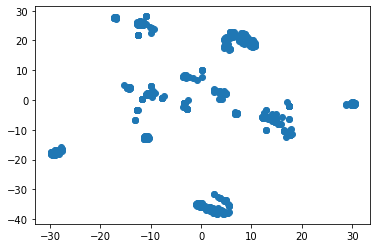

In [60]:
# plot the tsne data to see if there are clusters
plt.scatter(coin_tsne[:,0], coin_tsne[:,1])
plt.show()

A cursory examination of the TSNE scatter plot indicates several notable clusters.

### Cluster Analysis with k-Means

In [69]:
# establish variables for loop
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coin_tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

# preview elbow data
elbow_df

C:\Users\kelln\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,294820.718750
1,2,167339.781250
2,3,98731.820312
3,4,55622.242188
4,5,37744.347656
5,6,20973.216797
6,7,15128.730469
7,8,9671.597656
8,9,6247.531250
9,10,4973.897461


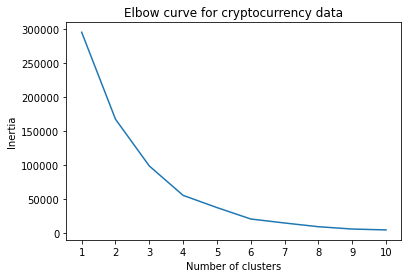

In [71]:
 # Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrency data')
plt.show()

The elbow appears to be at k=6.

### Recommendation

According to the analysis undertaken here, actively mined cryptocurrencies can be clustered for the purposes of investment speculation.  After reducing the dimensionality of the data to the greatest possible extent, the data can be clustered into 6 clusters while minimizing error within each cluster. 